Привет, Анна! 

Меня зовут Светлана Медведева и я буду проверять Твою работу. Предлагаю общаться на "ты". 

При обнаружении у Тебя в работе ошибки, в первый раз я лишь укажу на ее наличие и у Тебя будет возможность самому найти её и исправить. В реальной работе твой начальник будет поступать также, а я пытаюсь подготовить тебя именно к работе аналитиком. Однако если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

Просьба при доработке работы оставлять мои комментарии без изменений.

Комментарии я разделяю на следующие категории:

<div class="alert alert-block alert-success">
В случае если всё верно!
</div>


<div class="alert alert-block alert-warning">
В случае если можно что-то доработать, но эта доработка не критична или если есть варианты улучшения работы.
</div>

<div class="alert alert-block alert-danger">
Замечания, которые нужно исправить. Без исправления этих замечаний проект принят не может быть.
</div>

### <font color='blue'>Резензия на работу</font>
* Отличная работа!
* Молодец, Ты детально проанализировала данные и сделала вывод и рекомендации по открытию нового заведения.
* Однако обрати внимание, что некоторые графики можно проанализировать более детально.
* Работа зачтена :)
* Успехов на следующем спринте!

# Исследование рынка заведений общественного питания Москвы

Цель: исследование рынка для открытия кафе. Предоставлены открытые данные о заведениях общественного питания в Москве.

1. [Загрузка библиотек, предобработка данных](#step1)  
2. [Соотношение видов объектов общественного питания по количеству](#step2) 
3. [2.2 Cоотношение сетевых и несетевых заведений по количеству.](#step3)
4. [2.3 Сетевое распространение](#step4)
5. [2.4 Xарактерные особенности сетевых заведений](#step5)
6. [2.5 Самое большое количество посадочных мест](#step6)
7. [2.6 Топ-10 улиц по количеству объектов общественного питания](#step7)
8. [2.7 Улицы с одним объектом общественного питания](#step8)
9. [2.8 Распределение количества посадочных мест на самых оживленных улицах](#step9)
10.[3. Вывод](#step10)

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Молодец, что описал цель проекта и добавила содержание со ссылками.
</div>

<a id="step1"></a> 

# 1. Загрузка библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/rest_data.csv')
data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
data.duplicated().sum()

0

## Вывод

Пропусков и дубликатов в данных нет, все типы данных соответствуют своим значениеям.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, пропусков и явных дубликатов нет (но имеет смысл проверить наличие дубликатов после приведения названий заведений к одному формату).
</div>

<a id="step2"></a> 

## 2.1 Соотношение видов объектов общественного питания по количеству

In [5]:
type_cafe = data['object_type'].value_counts().reset_index()
type_cafe

,index,object_type
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


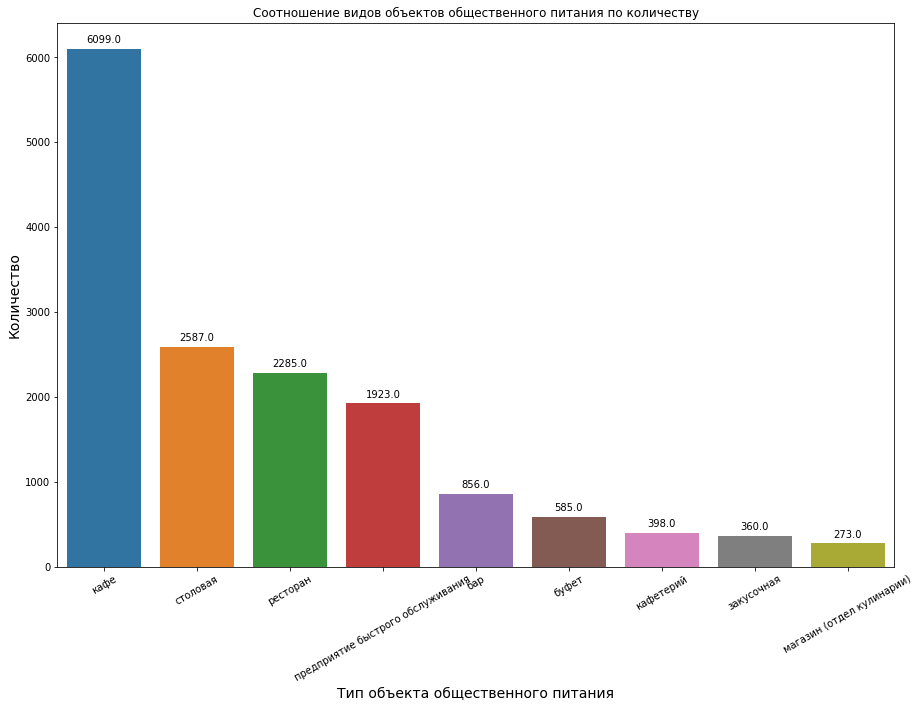

In [6]:
plt.figure(figsize=(15, 10))
splot=sns.barplot(x="index", y="object_type", data=type_cafe)
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Тип объекта общественного питания", size=14)
plt.ylabel("Количество", size=14)
splot.set_xticklabels(splot.get_xticklabels(), rotation=30)
plt.title('Cоотношение видов объектов общественного питания по количеству');

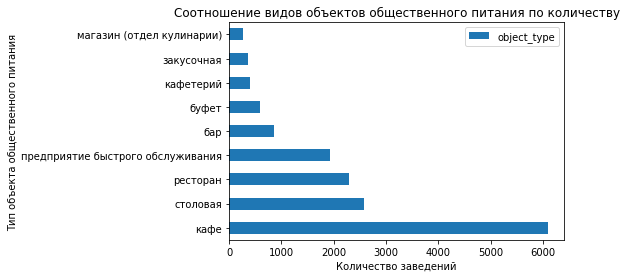

In [7]:
ax = type_cafe.plot.barh(x='index', y='object_type')
ax.set(title='Cоотношение видов объектов общественного питания по количеству',
xlabel = 'Количество заведений', ylabel='Тип объекта общественного питания');
                   

Наиболее популярные виды объектов общественного питания в Москве это кафе, столовая и ресторан. Магазин(отдел кулинапии) и закусочная распространены меньше всего.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличные графики и анализ данных, но было бы здорово пояснить почему преобладают кафе, а вот другие типы заведений менее популярны.
</div>

<a id="step3"></a> 

## 2.2 Cоотношение сетевых и несетевых заведений по количеству.

In [8]:
chain = data['chain'].value_counts().reset_index()
chain

,index,chain
0,нет,12398
1,да,2968


In [9]:
chain.at[0, 'index'] = 'несетевой'
chain.at[1, 'index'] = 'сетевой'
chain

,index,chain
0,несетевой,12398
1,сетевой,2968


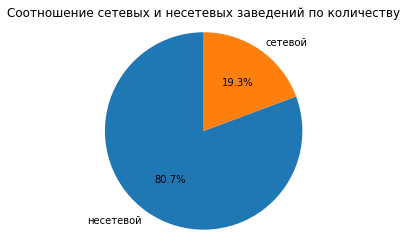

In [10]:
qu = chain.loc[:, 'chain']
cha = chain.loc[:, 'index']
fig1, ax1 = plt.subplots() 
ax1.pie(qu, labels=cha, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal') 
plt.title('Cоотношение сетевых и несетевых заведений по количеству')
plt.show()

Сетевых объектов практически в 4 раза меньше, чем несетевых (12398 против 2968). 

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Подумай, пожалуйста, с чем может быть связано преобладание несетевых заведений.
</div>

<a id="step4"></a> 

## 2.3 Для какого вида объекта общественного питания характерно сетевое распространение

In [11]:
chain_type = pd.pivot_table(data, values='id', index='object_type',
                    columns='chain', aggfunc=np.sum).reset_index()
chain_type.columns = ['тип', 'несетевой', 'сетевой']
chain_type

,тип,несетевой,сетевой
0,бар,4806907,116355855
1,буфет,1874466,37793575
2,закусочная,8257583,53245363
3,кафе,160789883,645393824
4,кафетерий,9054576,59510241
5,магазин (отдел кулинарии),13409322,33596637
6,предприятие быстрого обслуживания,100545063,197733789
7,ресторан,51855874,195676511
8,столовая,204267,149514812


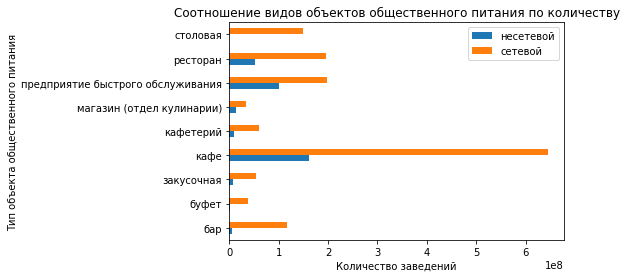

In [12]:
ax = chain_type.plot.barh(x='тип', y=['несетевой', 'сетевой'])
ax.set(title='Cоотношение видов объектов общественного питания по количеству',
xlabel = 'Количество заведений', ylabel='Тип объекта общественного питания');

Для сетевых заведений кафе является самым распространенным объектом общественного питания. 2-е и 3-е место у фастфуда и ресторанов.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Вижу, что Ты проанализировала графики. Однако, было бы здорово немного более подробно описать найденные в данных закономерности.
</div>

<a id="step5"></a> 

## 2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [13]:
chain_numbers = data.query('chain == "да"')
chain_numbers

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [14]:
ch = chain_numbers.groupby('object_name').agg({'object_name':'count','number':'mean'})
ch.columns = ['количество', 'места']
ch

,количество,места
object_name,,
Beverly Hills Diner,1,88.000000
Bierloga,1,75.000000
Black & White,1,40.000000
Bocconcino,3,66.666667
BooBo,1,46.000000
...,...,...
кафе «Папа Джонс»,1,24.000000
кафе «Старбакс»,2,63.500000
кафе «Шоколадница»,1,50.000000


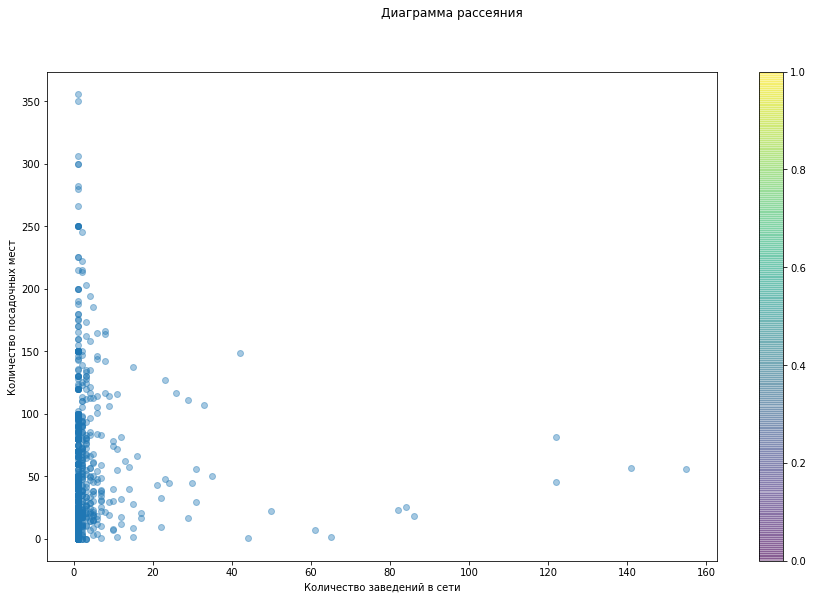

In [15]:

x = ch['количество']
y = ch['места']
fig,ax = plt.subplots(figsize=(15,9))
plt.scatter(x, y, alpha=0.4,
            cmap='viridis')
plt.suptitle('Диаграмма рассеяния')
plt.xlabel('Количество заведений в сети')
plt.ylabel('Количество посадочных мест')
plt.colorbar();

У сетевых объктов преобладают сети с небольшим количеством заведений (до 10) и количеством посадочных мест до 100. 

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Ок, график простроен и данные проанализированы :)
</div>

<a id="step6"></a> 

## 2.5 Какой вид предоставляет в среднем самое большое количество посадочных мест? 

In [16]:
mean_num = data.groupby('object_type')['number'].mean().sort_values().reset_index()

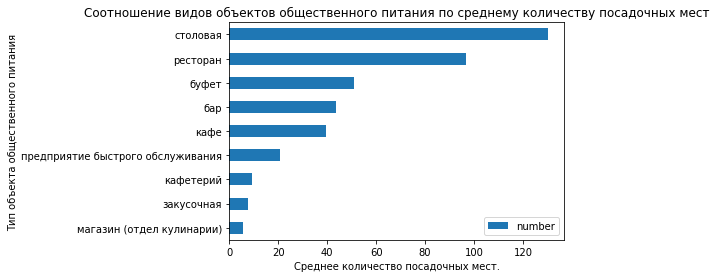

In [17]:
ax = mean_num.plot.barh(x='object_type', y='number')
ax.set(title='Cоотношение видов объектов общественного питания по cреднему количеству посадочных мест',
xlabel = 'Cреднее количество посадочных мест.', ylabel='Тип объекта общественного питания');

Наибольшее количество мест в столовых и ресторанах. Наименьшее в магазинах (отдел кулинарии).

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, верно. А с чем это может быть связано (наибольшее количество мест в столовых и ресторанах, а наименьшее в магазинах, кафетериях и закусочных)?
</div>

Добавление столбца с информацией об улице

In [18]:
import re
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

data["street"] = data["address"].str.extract(str_pat, flags=re.I)

In [19]:
data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
street         14916 non-null object
dtypes: int64(2), object(5)
memory usage: 840.5+ KB


In [21]:
#улица не проставилась там, где улицы изначально нет, в основном эти адреса на окраине (поселения, микрорайоны). 
#Для топ10 они не важны, так что их можно удалить
data[data['street'].isnull()]

,id,object_name,chain,object_type,address,number,street
394,150654,Love,нет,кафе,"город Москва, 2-й квартал Капотня, дом 1",40,NaN
859,23601,Буфет - ГБОУ СОШ № 64,нет,буфет,"Партизанская улица, дом 30",100,NaN
860,23604,Буфет - ГБОУ 60,нет,буфет,"Партизанская улица, дом 30",100,NaN
1405,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,NaN
1406,68113,Френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,NaN
...,...,...,...,...,...,...,...
14997,216942,Шашлычный дворик,нет,кафе,"город Москва, поселение Десеновское, деревня В...",15,NaN
14998,216926,Кафе «Сахли»,нет,закусочная,"город Москва, поселение Десеновское, деревня В...",10,NaN
15015,208239,ГАЗПРОМНЕФТЬ,нет,кафе,"поселение ""Мосрентген"", деревня Дудкино, владе...",20,NaN
15184,220587,Пицца Паоло,да,кафетерий,"город Москва, город Зеленоград, корпус 1627",0,NaN


In [22]:
data = data.dropna(axis='index')

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, улицы выделены в отдельный столбец.
</div>

<a id="step7"></a> 

## 2.6 график топ-10 улиц по количеству объектов общественного питания.

In [23]:
top_10 = data.groupby('street')['object_type'].count().reset_index()
top_10 = top_10.sort_values(by='object_type', ascending=False)

In [24]:
top_10 = top_10.head(10)

In [25]:
top_10
top_10.columns = ['streetname', 'object_type']
top_10

,streetname,object_type
1418,проспект Мира,204
1009,Профсоюзная улица,182
683,Ленинградский проспект,171
993,Пресненская набережная,167
397,Варшавское шоссе,164
686,Ленинский проспект,147
1414,проспект Вернадского,132
673,Кутузовский проспект,114
596,Каширское шоссе,112
603,Кировоградская улица,110


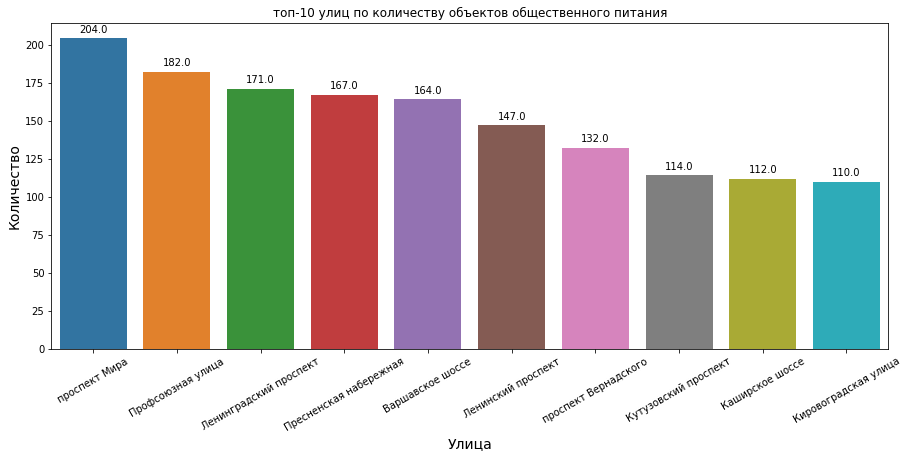

In [26]:
plt.figure(figsize=(15, 6))
splot=sns.barplot(x="streetname", y="object_type", data=top_10)
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Улица", size=14)
plt.ylabel("Количество", size=14)
splot.set_xticklabels(splot.get_xticklabels(), rotation=30)
plt.title('топ-10 улиц по количеству объектов общественного питания');

In [27]:
from io import BytesIO
import requests
spreadsheet_id = '1NKJnnxvCs0N2wDXTSG3Faa-vjG5-rnU1'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [28]:
top10 = top_10.merge(df, on='streetname')
top10

,streetname,object_type,areaid,okrug,area
0,проспект Мира,204,70,СВАО,Алексеевский район
1,проспект Мира,204,86,СВАО,Ярославский Район
2,проспект Мира,204,78,СВАО,Район Марьина роща
3,проспект Мира,204,79,СВАО,Останкинский район
4,проспект Мира,204,81,СВАО,Район Ростокино
5,проспект Мира,204,82,СВАО,Район Свиблово
6,проспект Мира,204,16,ЦАО,Мещанский район
7,Профсоюзная улица,182,123,ЮЗАО,Академический район
8,Профсоюзная улица,182,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,134,ЮЗАО,Район Ясенево


In [29]:
pivot_top10 = pd.pivot_table(top10, values='area', index='streetname', columns='object_type',
                     aggfunc='count').reset_index()
pivot_top10

object_type,streetname,110,112,114,132,147,164,167,171,182,204
0,Варшавское шоссе,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
1,Каширское шоссе,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Кировоградская улица,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Кутузовский проспект,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ленинградский проспект,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
5,Ленинский проспект,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
6,Пресненская набережная,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
7,Профсоюзная улица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
8,проспект Вернадского,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
9,проспект Мира,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


Улицы из топ-10 улиц по количеству объектов общественного питания это главные магистрали Москвы, длинные по своей протяженности и каждвя из них находится одновременно в нескольних районах города.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Ты верно отметила, что это довольно длинные улицы и скорее всего большое число заведений связано с длиной этих улиц.
</div>

<a id="step8"></a> 

## 2.7 Число улиц с одним объектом общественного питания

In [30]:
data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


In [31]:
one_cafe = data.groupby('street')['object_name'].count().reset_index()
one_cafe

,street,object_name
0,1-й Автозаводский проезд,3
1,1-й Амбулаторный проезд,2
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
...,...,...
1894,улица Юности,8
1895,улица Юных Ленинцев,22
1896,улица Яблочкова,7
1897,шоссе Фрезер,1


In [32]:
only_one = one_cafe.query('object_name == 1')
only_one.columns = ['streetname', 'cafe_amount']
only_one

,streetname,cafe_amount
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1
...,...,...
1886,улица Шумилова,1
1887,улица Шумкина,1
1891,улица Щорса,1
1892,улица Энгельса,1


In [33]:
only1 = only_one.merge(df, on='streetname')
only1

,streetname,cafe_amount,areaid,okrug,area
0,1-й Балтийский переулок,1,54,САО,Район Аэропорт
1,1-й Басманный переулок,1,13,ЦАО,Басманный район
2,1-й Басманный переулок,1,15,ЦАО,Красносельский район
3,1-й Ботанический проезд,1,82,СВАО,Район Свиблово
4,1-й Вешняковский проезд,1,120,ЮВАО,Рязанский район
...,...,...,...,...,...
559,улица Шеногина,1,92,СЗАО,Район Хорошево-Мневники
560,улица Шумилова,1,113,ЮВАО,Район Кузьминки
561,улица Шумкина,1,26,ВАО,Район Сокольники
562,улица Щорса,1,46,ЗАО,Район Солнцево


Всего 551 улица с одним объектом общественного питания, все они не длинные по протяженности и находятся как правило внутри одного района.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, скорее всего одно заведение на улицу связано с малой протяжённостью этих улиц. Кстати, если интересно, то вот самые короткие улицы в мире: https://www.smithsonianmag.com/travel/top-ten-small-streets-worth-visiting-180954589/
</div>

<a id="step9"></a> 

## 2.8 Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [34]:
data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


In [35]:
most_cafe = one_cafe.sort_values('object_name', ascending=False)
most_cafe

,street,object_name
1418,проспект Мира,204
1009,Профсоюзная улица,182
683,Ленинградский проспект,171
993,Пресненская набережная,167
397,Варшавское шоссе,164
...,...,...
751,Малый Коптевский проезд,1
1486,улица Благуша,1
1487,улица Богданова,1
1488,улица Богородский Вал,1


In [36]:
# выберем 50 улиц с наибольшим количеством заведений
most_cafe50 = most_cafe.head(50)

In [37]:
most_cafe50= most_cafe50.merge(data, on='street', how='inner')
most_cafe50

,street,object_name_x,id,object_name_y,chain,object_type,address,number
0,проспект Мира,204,149899,Сухарева Башня,нет,кафе,"город Москва, проспект Мира, дом 5, корпус 1",10
1,проспект Мира,204,69300,Ваби-Саби,да,кафе,"город Москва, проспект Мира, дом 29",64
2,проспект Мира,204,71378,Шоколадница,да,кафе,"город Москва, проспект Мира, дом 29",40
3,проспект Мира,204,146123,Джаганнат,да,кафе,"город Москва, проспект Мира, дом 31",25
4,проспект Мира,204,137644,Krispy Creme,да,кафе,"город Москва, проспект Мира, дом 40",36
...,...,...,...,...,...,...,...,...
4223,Нижняя Красносельская улица,47,208790,Plov.com,нет,кафе,"город Москва, Нижняя Красносельская улица, дом...",20
4224,Нижняя Красносельская улица,47,208793,Арарат,нет,кафе,"город Москва, Нижняя Красносельская улица, дом...",15
4225,Нижняя Красносельская улица,47,208796,Гемриеле,нет,кафе,"город Москва, Нижняя Красносельская улица, дом...",20
4226,Нижняя Красносельская улица,47,208799,Чеченская кухня,нет,кафе,"город Москва, Нижняя Красносельская улица, дом...",20


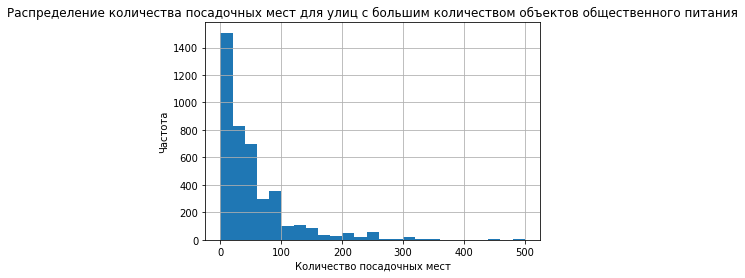

In [38]:
most_cafe50.hist('number', bins=25, range=(0,500))
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания');

На самых оживленных улицах Москвы преобладают заведения с количеством посадочных мест до 20. Также значительна доля заведений с количеством мест от 20 до 100. Есть отдельные заведения на 300-500 посадочных мест.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличный анализ :)
</div>

<a id="step10"></a> 

# Вывод

- Исходя из проанализированных данных, в настоящее время лучше всего открыть небольшое кафе на 20 посадочных мест. Сейчас такая ситуация в стране, что востребована недорогая еда. Люди не стали больше зарабатывать за последнее время, наоборот, доходы населения, уменьшились. Поэтому экономия на обслуживающем персонале, которых заменит робот приведет в том числе к снижению стоимости блюд.

- В дальнейшем можно будет развить сеть и увеличить количество посадочных мест в кафе.

- Лучше выбрать проходимое место на оживленных улицах и/или вблизи метро. Район СВАО, ЦАО или ЮЗАО. Там наибольшая конкуренция, но самые людные места и за счет обслуживания роботами и новизны, можно завоевать наибольшее количество посетителей.

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Хорошие рекомендации, но помимо рекомендаций в общем выводе должны быть описаны основные результаты проекта.
</div>

Презентация: https://drive.google.com/file/d/1hdb68COAfFO4YQY_VJpgNqItmW0cG9OZ/view?usp=sharing

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
В целом отличная презентация, молодец что добавила постановку задачи/проблемы, но нужно добавить последний слайд "Спасибо за внимание" или что-то похожее.
</div>